In [1]:
import pandas as pd

In [2]:
df = pd.read_excel(r'C:\Users\admin\Downloads\Raw test.xlsx')

In [3]:
df['Contact level 2'] = df['Contact level 2'].str.strip()
df

,TICKET_ID,CLEANED CONTENT,Contact level 1,Contact level 2,Resolution time (minutes)
0,241201.000655,sao tôi lại bị trừ tiền và k rõ lí do,Apple,Ví MoMo bị trừ tiền cho giao dịch không rõ ngu...,91
1,241201.000648,tôi đã bị trừ 345k mà k biết vì lí do gì,Apple,Ví MoMo bị trừ tiền cho giao dịch không rõ ngu...,786
2,241201.000638,t bị tự động gia hạn gói ytb perium lần đầu do...,Apple,Ví MoMo bị trừ tiền cho giao dịch không rõ ngu...,488
3,241201.000620,nội dung kh: như vậy sao nó không hiện ra tron...,Google,Yêu cầu hoàn tiền,797
4,241201.000615,"nội dung kh: chào momo, hiện tại tôi đang gặp...",Google,"Giao dịch thành công, Ví MoMo bị trừ tiền, khô...",1043
...,...,...,...,...,...
801,241125.000029,hoàn tiền. ko chấp nhận trừ tiền,Apple,Yêu cầu hoàn tiền,697
802,241125.000028,hoàn tiền cho tôi. tôi ko chấp nhận trừ tiền l...,Apple,Yêu cầu hoàn tiền,685
803,241125.000023,không đồng ý với dịch vụ . yêu cầu hoàn tiền,Apple,Yêu cầu hoàn tiền,690
804,241125.000017,tự trừ tiền khi tôi ko đồng ý dịch vụ,Apple,Ví MoMo bị trừ tiền cho giao dịch không rõ ngu...,277


In [4]:
contact2_counts = df['Contact level 2'].value_counts().reset_index()
contact2_counts.columns = ['Nhóm khiếu nại', 'Số lượng']

In [5]:
contact2_avg_time = df.groupby('Contact level 2')['Resolution time (minutes)'].mean().reset_index()
contact2_avg_time.columns = ['Nhóm khiếu nại', 'Thời gian xử lý TB (phút)']

In [6]:
summary = pd.merge(contact2_counts, contact2_avg_time, on='Nhóm khiếu nại')

In [7]:
summary

,Nhóm khiếu nại,Số lượng,Thời gian xử lý TB (phút)
0,Yêu cầu hoàn tiền,292,1377.476027
1,Ví MoMo bị trừ tiền cho giao dịch không rõ ngu...,259,281.212355
2,"Giao dịch thành công, Ví MoMo bị trừ tiền, khô...",55,1147.636364
3,Khách hàng đã liên hệ nhà cung cấp nhưng không...,55,2043.636364
4,Tư vấn thông tin giao dịch hoàn tiền,23,39.086957
5,Giao dịch chưa thành công nhưng đã bị trừ tiền,17,527.411765
6,Chưa nhận được tiền hoàn,14,1201.928571
7,Kiểm tra trạng thái liên kết,14,1637.357143
8,Khách hàng không đồng ý liên hệ nhà cung cấp,13,2122.538462
9,Hướng dẫn hủy thiết lập thanh toán,12,110.083333


In [8]:
pip install matplotlib pandas


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


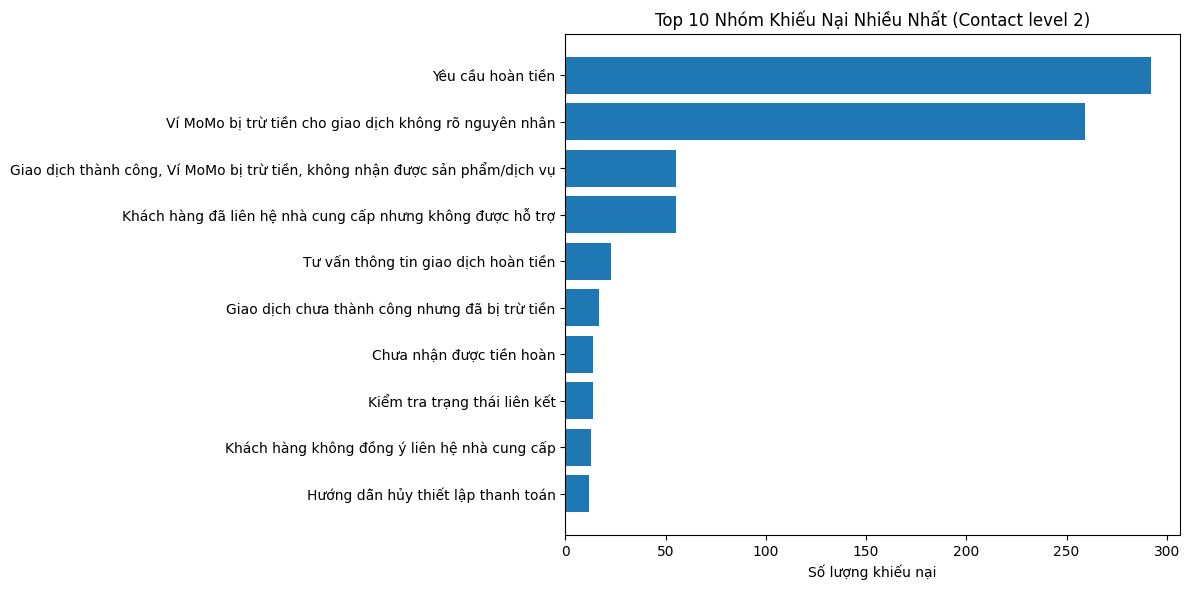

In [9]:
import matplotlib.pyplot as plt
top10 = summary.sort_values(by="Số lượng", ascending=False).head(10)

# Tạo biểu đồ
plt.figure(figsize=(12,6))
plt.barh(top10['Nhóm khiếu nại'], top10['Số lượng'])
plt.xlabel("Số lượng khiếu nại")
plt.title("Top 10 Nhóm Khiếu Nại Nhiều Nhất (Contact level 2)")
plt.gca().invert_yaxis()  # Để nhóm nhiều nhất ở trên cùng
plt.tight_layout()
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_15224\356816938.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


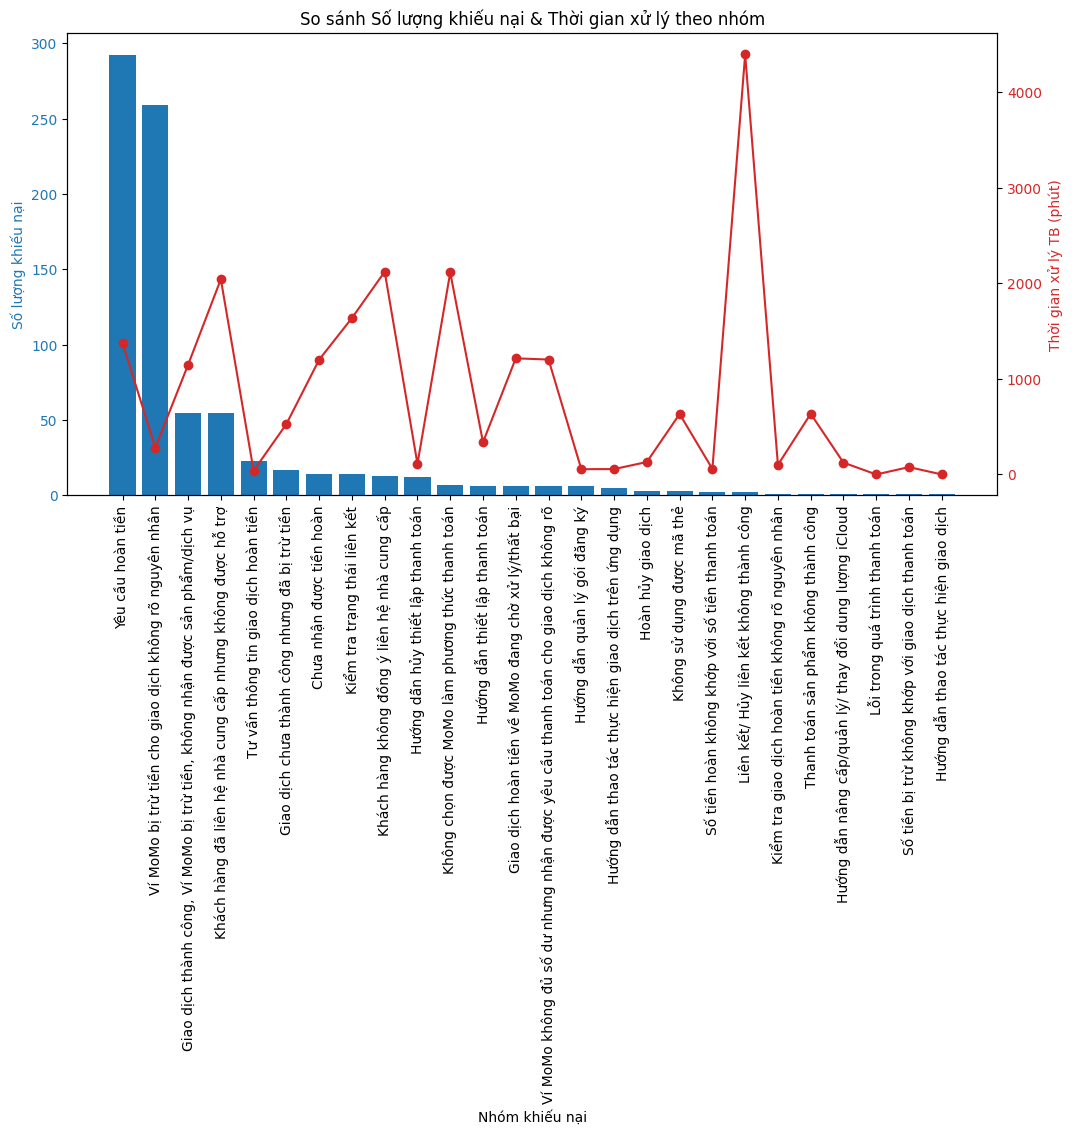

In [10]:
# Vẽ biểu đồ chồng 2 trục: Số lượng và thời gian
fig, ax1 = plt.subplots(figsize=(12,6))

# Trục 1: Số lượng
color = 'tab:blue'
ax1.set_xlabel('Nhóm khiếu nại')
ax1.set_ylabel('Số lượng khiếu nại', color=color)
ax1.bar(summary['Nhóm khiếu nại'], summary['Số lượng'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)

# Trục 2: Thời gian xử lý
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Thời gian xử lý TB (phút)', color=color)
ax2.plot(summary['Nhóm khiếu nại'], summary['Thời gian xử lý TB (phút)'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('So sánh Số lượng khiếu nại & Thời gian xử lý theo nhóm')
plt.tight_layout()
plt.show()